In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
df = pd.read_csv('data/Life_Expectancy_Data.csv')
print (df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0              263   
1     Afghanistan  2014  Developing              59.9              271   
2     Afghanistan  2013  Developing              59.9              268   
3     Afghanistan  2012  Developing              59.5              272   
4     Afghanistan  2011  Developing              59.2              275   
...           ...   ...         ...               ...              ...   
1644     Zimbabwe  2004  Developing              44.3              723   
1645     Zimbabwe  2003  Developing              44.5              715   
1646     Zimbabwe  2002  Developing              44.8               73   
1647     Zimbabwe  2001  Developing              45.3              686   
1648     Zimbabwe  2000  Developing              46.0              665   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [87]:
print(df.info(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

# Analisar os dataset 

A análise deste dataset terá como objetivo principal identificar e aplicar otimizações que facilitem o uso dos dados em trabalhos futuros. Para isso, será essencial garantir que o dataset esteja bem estruturado e livre de inconsistências. Os passos a serem seguidos incluem:

1. **Identificação de valores ausentes (missing values)**: Uma das primeiras tarefas será verificar se existem valores nulos ou ausentes em qualquer uma das colunas. 
Estes valores podem comprometer a análise e, portanto, será necessário tratá-los de forma adequada.

2. **Tratamento de valores ausentes**: Caso sejam identificados valores ausentes, eles serão substituídos por valores calculados, como a média ou a mediana da respectiva coluna. Esta abordagem ajuda a preservar a integridade estatística do dataset e evita a exclusão de dados relevantes.

3. **Limpeza dos dados**: Remover espaços desnecessários nos nomes das colunas e padronizar os formatos dos dados (por exemplo, datas, números e categorias) para assegurar a consistência e facilitar a análise posterior.

4. **Normalização de dados**: Avaliar se as variáveis numéricas precisam de normalização ou padronização, especialmente se forem usadas em algoritmos de machine learning.

5. **Estruturação dos dados**: Organizar os dados de forma que fiquem prontos para análises mais complexas, como visualizações, geração de relatórios e modelagem preditiva. Isso inclui transformar variáveis categóricas em variáveis dummy, se necessário, ou criar colunas derivadas com informações adicionais.

6. **Verificação de outliers**: Identificar valores extremos ou inconsistentes que possam indicar erros ou dados atípicos, e decidir como lidar com eles, seja removendo-os ou ajustando-os.

7. **Documentação**: Registrar todas as alterações e otimizações feitas no dataset para que o processo seja replicável e transparente para futuros trabalhos.

Ao final, o dataset resultante será otimizado para diversas aplicações, desde análises exploratórias até a criação de modelos de machine learning. Esta preparação permitirá não apenas uma análise mais eficiente, mas também resultados mais confiáveis e aplicáveis ao problema em questão. Caso desejes, posso começar a trabalhar em cada um desses passos com o dataset fornecido.

In [88]:
missing_values = df.isnull().sum()
print (missing_values)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [89]:
df.columns = df.columns.str.replace(' ', '') 
df.columns = [df.columns[0].lower()] + df.columns[1:].str.capitalize().tolist()  

print (df)

          country  Year      Status  Lifeexpectancy  Adultmortality  \
0     Afghanistan  2015  Developing            65.0             263   
1     Afghanistan  2014  Developing            59.9             271   
2     Afghanistan  2013  Developing            59.9             268   
3     Afghanistan  2012  Developing            59.5             272   
4     Afghanistan  2011  Developing            59.2             275   
...           ...   ...         ...             ...             ...   
1644     Zimbabwe  2004  Developing            44.3             723   
1645     Zimbabwe  2003  Developing            44.5             715   
1646     Zimbabwe  2002  Developing            44.8              73   
1647     Zimbabwe  2001  Developing            45.3             686   
1648     Zimbabwe  2000  Developing            46.0             665   

      Infantdeaths  Alcohol  Percentageexpenditure  Hepatitisb  Measles  ...  \
0               62     0.01              71.279624          65     

In [90]:
filtrarDados = df[(df["Year"] >= 2000) & (df["Year"] <= 2015)][["Year", "Population", "Alcohol","Hiv/aids", "Hepatitisb","Measles", "Lifeexpectancy", "Adultmortality"]]
filtrarDados = filtrarDados.sort_values(by="Year", ascending=False)
print (filtrarDados)

filtrarDados.to_csv('datasetFiltrado.csv', index=False)



      Year  Population  Alcohol  Hiv/aids  Hepatitisb  Measles  \
0     2015  33736494.0     0.01       0.1          65     1154   
16    2015     28873.0     4.60       0.1          99        0   
247   2014   7223938.0    12.03       0.1          95        0   
1112  2014   1764652.0     0.01       3.9          49     6855   
217   2014   2168573.0     0.01       2.3          95        1   
...    ...         ...      ...       ...         ...      ...   
1390  2000   4567864.0    11.12       0.1          77      152   
107   2000    811566.0    13.20       0.1          33        0   
1375  2000  44896856.0     7.30      21.3          73     1459   
762   2000     51313.0     0.49       0.1          93       32   
1648  2000  12222251.0     1.68      43.5          79     1483   

      Lifeexpectancy  Adultmortality  
0               65.0             263  
16              77.8              74  
247             74.3             138  
1112            53.6             362  
217         

In [91]:
print (df.columns) 
print (filtrarDados.columns)

Index(['country', 'Year', 'Status', 'Lifeexpectancy', 'Adultmortality',
       'Infantdeaths', 'Alcohol', 'Percentageexpenditure', 'Hepatitisb',
       'Measles', 'Bmi', 'Under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness1-19years',
       'Thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')
Index(['Year', 'Population', 'Alcohol', 'Hiv/aids', 'Hepatitisb', 'Measles',
       'Lifeexpectancy', 'Adultmortality'],
      dtype='object')


# Analise Exploratoria de Dados 
Análise Exploratória de Dados (EDA) ajudará a identificar padrões e relações entre esses fatores, o que pode fornecer insights valiosos sobre como eles afetam a mortalidade adulta e a expectativa de vida. Aqui estão os objetivos específicos da EDA para o dataset:

1. **Compreender a Estrutura dos Dados**
Objetivo: Obter uma visão geral sobre a distribuição e os tipos de dados de cada variável.
Como aplicar: Analisar os tipos de dados das variáveis (Year, Population, Alcohol, Hiv/aids, Hepatitisb, Measles, Lifeexpectancy, Adultmortality), identificando quais são numéricas e quais são categóricas.
Exemplo: Verificar se Year está no formato correto de ano, se as variáveis como Alcohol, Hiv/aids, e Hepatitisb são contínuas ou binárias, etc.

2. **Detectar Anomalias e Outliers**
Objetivo: Identificar valores atípicos e anômalos que possam distorcer a análise.
Como aplicar:
Usar gráficos de boxplot para examinar variáveis como Alcohol, Lifeexpectancy, Adultmortality, para verificar a presença de outliers.
Identificar valores faltantes nas variáveis numéricas, como Population, Hiv/aids, e decidir como tratá-los (preenchendo com a média ou removendo linhas).
Exemplo: Verificar se a população de um ano tem valores muito baixos ou muito altos que não fazem sentido.

3. **Avaliar a Qualidade dos Dados**
Objetivo: Verificar a integridade dos dados e tratar valores faltantes ou inconsistentes.
Como aplicar:
Analisar o número de valores nulos ou ausentes em cada variável.
Decidir o melhor tratamento para os dados ausentes (preenchê-los, removê-los, etc.).
Exemplo: Se houver valores ausentes para expectativa de vida (Lifeexpectancy), será necessário decidir se vamos preencher esses valores ou removê-los.

4. **Explorar Relações Entre Variáveis**
Objetivo: Entender como as variáveis estão inter-relacionadas, especialmente aquelas que impactam a mortalidade adulta e a expectativa de vida.
Como aplicar:
Utilizar matrizes de correlação para identificar como Alcohol, Hiv/aids, Hepatitisb, e Measles se relacionam com a mortalidade adulta e expectativa de vida.
Visualizar essas relações usando gráficos de dispersão entre Alcohol e Lifeexpectancy, Hiv/aids e Adultmortality, etc.
Exemplo: Verificar se há uma correlação negativa entre Hiv/aids e expectativa de vida, ou uma correlação positiva entre consumo de álcool e mortalidade adulta.

5. **Analisar Distribuições das Variáveis**
Objetivo: Compreender como cada variável se distribui, para que se possa aplicar transformações adequadas se necessário.
Como aplicar:
Usar histogramas ou gráficos de densidade para entender a distribuição das variáveis contínuas como Population, Alcohol, Lifeexpectancy, e Adultmortality.
Avaliar se as distribuições são assimétricas (skewed), o que pode sugerir a necessidade de transformações (como logaritmos ou normalização) para análise posterior.
Exemplo: Se a variável Population tem uma distribuição fortemente assimétrica, pode ser necessário fazer uma transformação logarítmica.

6. **Gerar Hipóteses**
Objetivo: Formar hipóteses sobre como as variáveis podem afetar a mortalidade adulta e a expectativa de vida.
Como aplicar:
Através da exploração das correlações, podemos levantar hipóteses, como por exemplo: "O aumento no consumo de álcool pode diminuir a expectativa de vida", ou "Países com altas taxas de HIV/AIDS apresentam maior mortalidade adulta".
Exemplo: Com base nas observações dos gráficos e da matriz de correlação, podemos investigar mais a fundo essas relações, utilizando métodos estatísticos ou de machine learning.

7. **Preparação dos Dados para Modelagem**
Objetivo: Preparar os dados para a construção de um modelo preditivo de saúde (por exemplo, previsão de Lifeexpectancy).
Como aplicar:
Decidir se deve normalizar ou padronizar variáveis como Alcohol e Hiv/aids, ou se precisa criar variáveis dummy para variáveis categóricas.
Realizar a divisão entre dados de treino e teste para validação do modelo preditivo.
Exemplo: Preparar os dados para um modelo de regressão linear ou árvores de decisão, dependendo das correlações encontradas na EDA.
Técnicas Comuns de Visualização na EDA:
Histograma – Para ver a distribuição de variáveis como Alcohol, Population, Lifeexpectancy.
Boxplot – Para verificar a presença de outliers em variáveis como Adultmortality.
Gráfico de dispersão – Para examinar a relação entre duas variáveis numéricas, como Alcohol e Lifeexpectancy.
Matriz de correlação – Para identificar a força das relações entre todas as variáveis.


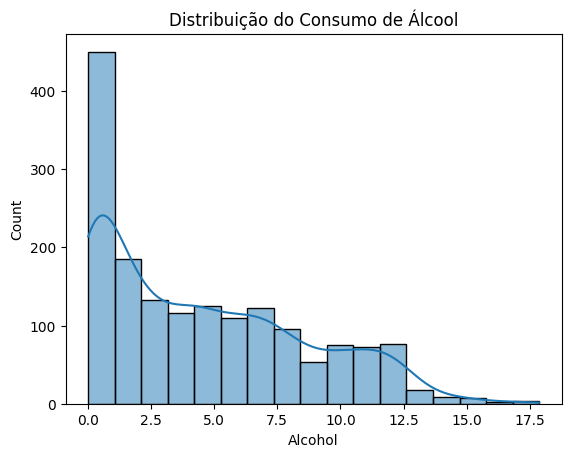

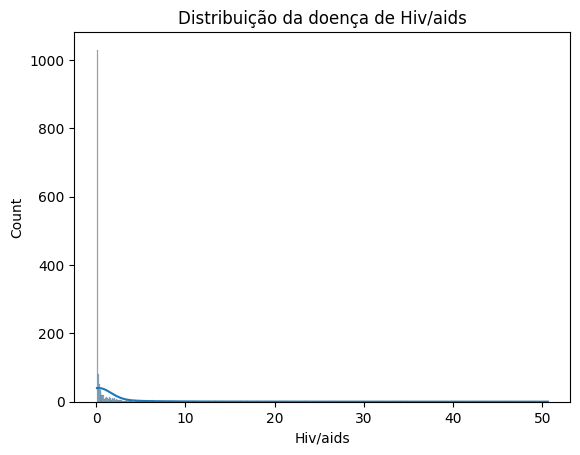

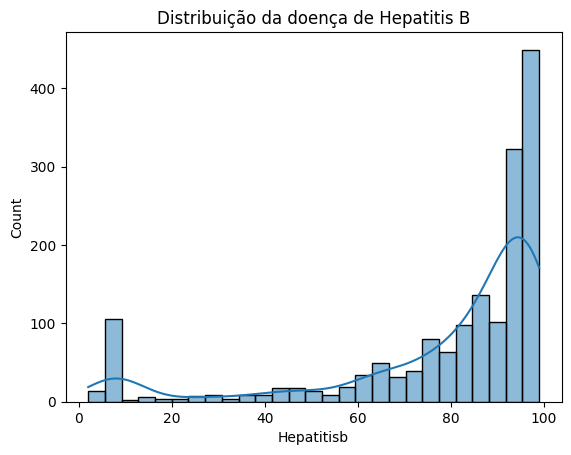

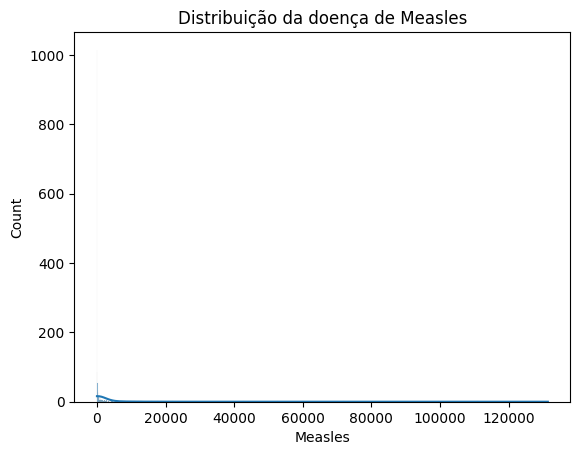

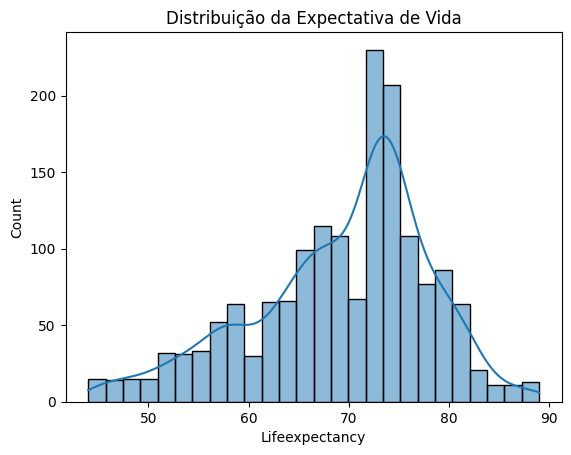

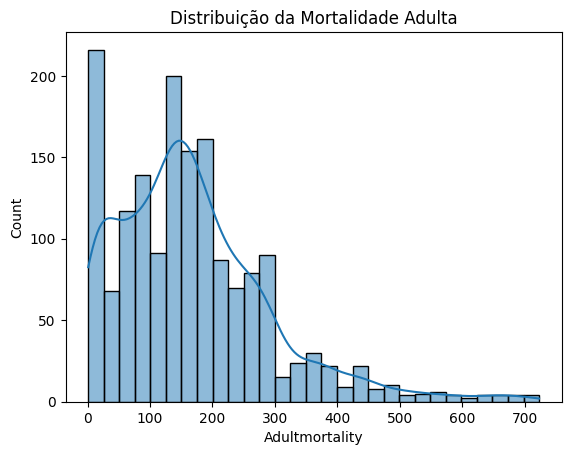

In [92]:
sns.histplot(filtrarDados['Alcohol'], kde=True)
plt.title('Distribuição do Consumo de Álcool')
plt.show()

sns.histplot(filtrarDados['Hiv/aids'], kde=True)
plt.title('Distribuição da doença de Hiv/aids')
plt.show()

sns.histplot(filtrarDados['Hepatitisb'], kde=True)
plt.title('Distribuição da doença de Hepatitis B')
plt.show()

sns.histplot(filtrarDados['Measles'], kde=True)
plt.title('Distribuição da doença de Measles')
plt.show()

sns.histplot(filtrarDados['Lifeexpectancy'], kde=True)
plt.title('Distribuição da Expectativa de Vida')
plt.show()

sns.histplot(filtrarDados['Adultmortality'], kde=True)
plt.title('Distribuição da Mortalidade Adulta')
plt.show()

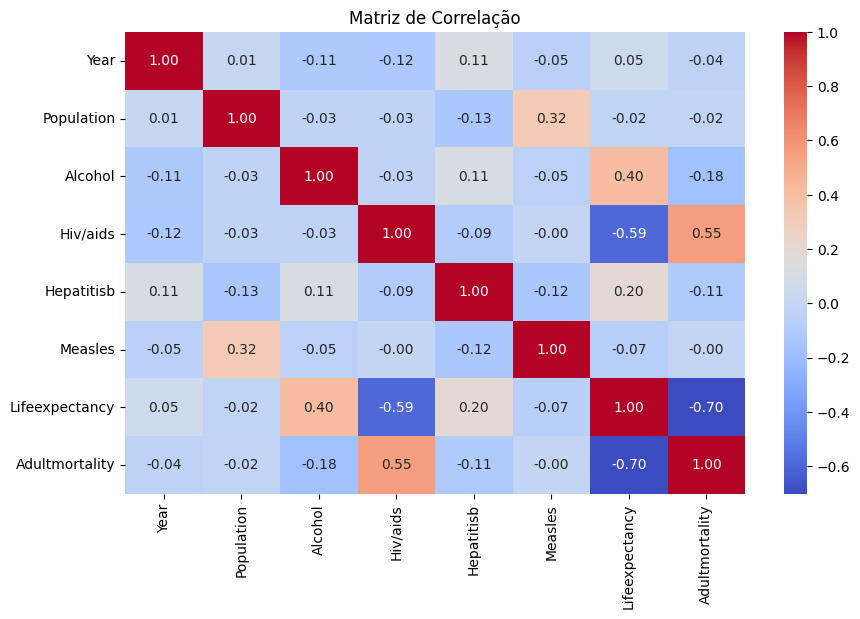

In [93]:
correlation_matrix = filtrarDados.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [94]:
X = filtrarDados[['Alcohol', 'Hiv/aids', 'Hepatitisb', 'Measles', 'Adultmortality']]
y = filtrarDados['Lifeexpectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 3.8141701750222787
Mean Squared Error: 27.600818868740102
R-squared: 0.642973579750695


# Explicação dos resulados obtidos 

1. **Mean Absolute Error (MAE)** - Erro Médio Absoluto
Valor: 3.8141701750222787

O MAE é a média das diferenças absolutas entre os valores previstos pelo modelo e os valores reais. Ele mede o quanto, em média, o modelo erra para cada previsão, sem considerar a direção do erro (se é positivo ou negativo).

**Interpretação:**
Um MAE de 3.81 significa que, em média, o modelo está errando cerca de 3.81 unidades (da variável de saída, como "expectativa de vida" ou "mortalidade") em suas previsões.
O MAE é uma métrica fácil de interpretar porque a unidade é a mesma da variável que está sendo prevista.


2. **Mean Squared Error (MSE)** - Erro Quadrático Médio
Valor: 27.600818868740102

O MSE calcula a média dos quadrados das diferenças entre os valores previstos e os valores reais. Diferente do MAE, ele penaliza erros maiores de forma mais intensa, porque os erros são elevados ao quadrado.

**Interpretação:**
Um MSE de 27.60 significa que, em média, o quadrado da diferença entre as previsões e os valores reais é 27.60.
O MSE é útil para identificar modelos que cometem grandes erros em alguns pontos, já que erros maiores afetam mais o valor do MSE. Isso ocorre porque ao elevar as diferenças ao quadrado, erros mais significativos são mais impactantes.


3. **R-squared (R²)** - Coeficiente de Determinação
Valor: 0.642973579750695

O R² é uma métrica que indica a proporção da variação na variável dependente (por exemplo, expectativa de vida ou mortalidade) que é explicada pelo modelo. O R² varia de 0 a 1, onde:
0 significa que o modelo não explica nenhuma variação nos dados.
1 significa que o modelo explica toda a variação nos dados.

**Interpretação:**
Um R² de 0.64 significa que o modelo consegue explicar 64.3% da variação dos dados.
Isso indica que o modelo tem um desempenho razoável, pois é capaz de capturar uma porção significativa da variação nos dados, mas ainda há cerca de 35.7% de variação que não é explicada pelo modelo, o que pode ser devido a fatores não incluídos no modelo ou ao erro aleatório.


**Conclusão**
MAE: O modelo, em média, erra por cerca de 3.81 unidades.
MSE: O modelo tem um erro quadrático médio de 27.60, o que significa que erros maiores têm mais impacto, pois são penalizados mais fortemente.
R²: O modelo explica aproximadamente 64.3% da variação nos dados. Isso é uma boa indicação de que o modelo tem algum poder preditivo, mas ainda há espaço para melhorias.

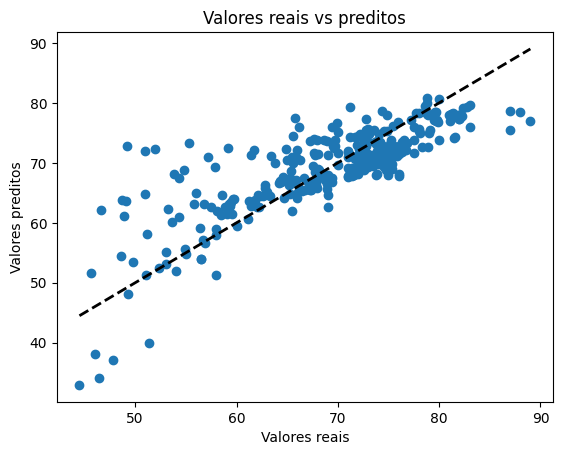

In [95]:
# Visualização dos valores reais vs preditos
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.title('Valores reais vs preditos')
plt.show()

In [96]:
# Exibir coeficientes das variáveis independentes
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

                Coeficiente
Alcohol            0.663256
Hiv/aids          -0.460993
Hepatitisb         0.025150
Measles           -0.000022
Adultmortality    -0.033400


# Explicar o resultado de Coeficientes das variáveis 

Esses valores representam os coeficientes de um modelo de regressão linear, onde cada valor indica a relação entre uma variável explicativa (independente) e a variável dependente (a que está a ser prevista, por exemplo, expectativa de vida ou mortalidade). Vou explicar o que cada coeficiente significa em detalhes.

Coeficientes:
Alcohol: 0.663256

O coeficiente de Álcool indica que, para cada unidade adicional de consumo de álcool (presumivelmente em termos de uma medida quantitativa, como litros ou gramas), a variável dependente (por exemplo, expectativa de vida) aumenta em 0.663 unidades.

Isto significa que a relação é positiva, o que sugere que um aumento no consumo de álcool está associado a um aumento na variável de resposta. Embora isso possa ser contra-intuitivo (geralmente, o consumo de álcool está associado a problemas de saúde que diminuem a expectativa de vida), essa relação positiva pode refletir algum efeito de correlação que precisa ser analisado mais a fundo, possivelmente considerando outras variáveis em conjunto.

Hiv/aids: -0.460993
O coeficiente de HIV/AIDS indica que, para cada unidade adicional de prevalência de HIV/AIDS (por exemplo, uma taxa de infecção mais alta), a variável dependente (como expectativa de vida) diminui em 0.461 unidades.

Isto significa que a relação é negativa, o que é esperado, pois uma maior prevalência de HIV/AIDS tende a reduzir a expectativa de vida e aumentar a mortalidade, devido aos impactos negativos dessa condição sobre a saúde. Esse valor indica que o HIV/AIDS tem um efeito considerável sobre a variável dependente.

Hepatitisb: 0.025150
O coeficiente de Hepatite B indica que, para cada unidade adicional de prevalência de Hepatite B, a variável dependente aumenta em 0.025 unidades.

Isto significa que a relação aqui é positiva, mas o coeficiente é muito pequeno. Isso significa que, embora a Hepatite B tenha uma associação com a variável de resposta, seu efeito é relativamente fraco em comparação com outras variáveis como Álcool ou HIV/AIDS. A Hepatite B ainda pode ter algum impacto, mas esse impacto é pequeno em relação aos outros fatores.

Measles: -0.000022
O coeficiente de Sarampo (Measles) indica que, para cada unidade adicional de prevalência de sarampo, a variável dependente diminui em 0.000022 unidades.
Isto signfica que a relação é negativa, mas o coeficiente é extremamente pequeno, indicando que a presença de sarampo tem um efeito muito pequeno sobre a variável dependente (por exemplo, expectativa de vida ou mortalidade). Esse valor sugere que, embora o sarampo possa ter um impacto na saúde, seu efeito sobre a variável analisada é quase insignificante em comparação com outras doenças ou fatores.

Adultmortality: -0.033400
O coeficiente de Mortalidade Adulta indica que, para cada unidade adicional de mortalidade adulta, a variável dependente (como expectativa de vida) diminui em 0.033 unidades.
isto significa que relação é negativa, o que faz sentido, já que maior mortalidade adulta está associada a uma expectativa de vida mais baixa. Isso reflete uma correlação direta onde um aumento na taxa de mortalidade adulta resulta em uma diminuição na expectativa de vida ou aumento na mortalidade em geral.

Resumo das Relações:

Álcool: Existe uma correlação positiva com a variável dependente, sugerindo que o consumo de álcool, de acordo com este modelo, está associado a uma maior expectativa de vida (ou outra variável dependente). No entanto, isso pode ser uma correlação espúria ou algo a ser investigado com mais profundidade.
HIV/AIDS: Há uma relação negativa significativa, o que é esperado, pois o HIV/AIDS impacta negativamente a saúde, diminuindo a expectativa de vida e aumentando a mortalidade.
Hepatite B: A relação é positiva, mas fraca, sugerindo um impacto pequeno na variável dependente, mas ainda assim relevante.
Sarampo: A relação é extremamente pequena e negativa, o que indica que o sarampo, neste caso, não tem um impacto significativo sobre a variável dependente.
Mortalidade Adulta: A relação negativa é esperada, uma vez que a mortalidade adulta está diretamente ligada à redução da expectativa de vida.

Considerações Finais:
Esses coeficientes ajudam a entender a influência relativa de cada variável na previsão da variável dependente.
A magnitude dos coeficientes indica quanto cada variável impacta a variável dependente.
As variáveis com coeficientes maiores têm um impacto mais forte, enquanto as com coeficientes menores têm um impacto mais fraco. É importante considerar o contexto e realizar uma análise adicional para avaliar se esses coeficientes fazem sentido em termos de causalidade, especialmente para variáveis como Álcool que podem ter outros fatores de confusão.